```text
=================================================

Inference Data Test

Created By  : Ahmad Naufal Budianto

=================================================
```

# Introduction

This program is designed to perform **classification** using the `XGB` algorithm with the best parameters on inference data that has been previously saved into `data_inf.csv`.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Libraries for modelling.
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Library for model loading.
import pickle

# Data and Best Model Loading

In [2]:
# Data Loading
## Display max column.
pd.set_option("display.max_columns", 500)

## Data loading.
data_inf = pd.read_csv("/Users/Naufal's/Desktop/Hacktiv8 Tugas/p1-ftds031-rmt-m2-naufalbudianto28/data_inf.csv")

# Model Loading
best_xgb_inf = pickle.load(open('best_model_xgb.pkl', 'rb'))

In [3]:
data_inf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,admin,married,secondary,no,1049,yes,no,unknown,23,may,25,14,-1,0,unknown,no
1,34,blue-collar,married,secondary,no,765,no,no,cellular,25,jul,238,1,-1,0,unknown,no
2,58,unemployed,married,secondary,no,2690,no,no,cellular,7,aug,142,2,-1,0,unknown,no
3,28,housemaid,married,secondary,no,15,yes,no,telephone,25,jul,133,7,-1,0,unknown,no
4,38,management,married,tertiary,no,1257,no,no,cellular,12,oct,166,1,-1,0,unknown,no


In [4]:
data_inf.shape

(2159, 17)

In [5]:
data_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2159 non-null   int64 
 1   job        2159 non-null   object
 2   marital    2159 non-null   object
 3   education  2159 non-null   object
 4   default    2159 non-null   object
 5   balance    2159 non-null   int64 
 6   housing    2159 non-null   object
 7   loan       2159 non-null   object
 8   contact    2159 non-null   object
 9   day        2159 non-null   int64 
 10  month      2159 non-null   object
 11  duration   2159 non-null   int64 
 12  campaign   2159 non-null   int64 
 13  pdays      2159 non-null   int64 
 14  previous   2159 non-null   int64 
 15  poutcome   2159 non-null   object
 16  y          2159 non-null   object
dtypes: int64(7), object(10)
memory usage: 286.9+ KB


In [10]:
best_xgb_inf

Pipeline(steps=[('preprocessor_xgb',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('ord',
                                                  Pipeline(steps=[('ode',
                                                                   OrdinalEncoder(categories=[['primary',
                                                                                               'secondary',
                                                                                               'tertiary']]))]),
                                                  ['education']),
                                                 ('cat',
                                                  Pipeline(steps=[('oh',
                                                                   OneHotEncoder(handle_unknown='ignore...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

Inference data successfully loaded with `2,159 entries` and `15 features`. The best modeling pipeline also loaded successfully, involving a `ColumnTransformer` followed by classification using the `XGB Best Parameter` algorithm.

# Feature Selection

Based on the EDA in the main program, no correlation was found in the columns `age`, `day`, `month`, and `default`. Therefore, these columns will be dropped.

In [6]:
data_inf = data_inf.drop(columns=['age', 'day', 'month', 'default'])
data_inf.head()

,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,admin,married,secondary,1049,yes,no,unknown,25,14,-1,0,unknown,no
1,blue-collar,married,secondary,765,no,no,cellular,238,1,-1,0,unknown,no
2,unemployed,married,secondary,2690,no,no,cellular,142,2,-1,0,unknown,no
3,housemaid,married,secondary,15,yes,no,telephone,133,7,-1,0,unknown,no
4,management,married,tertiary,1257,no,no,cellular,166,1,-1,0,unknown,no


# Data Split

In [7]:
X_inf = data_inf.drop('y', axis=1)
y_inf = data_inf['y']

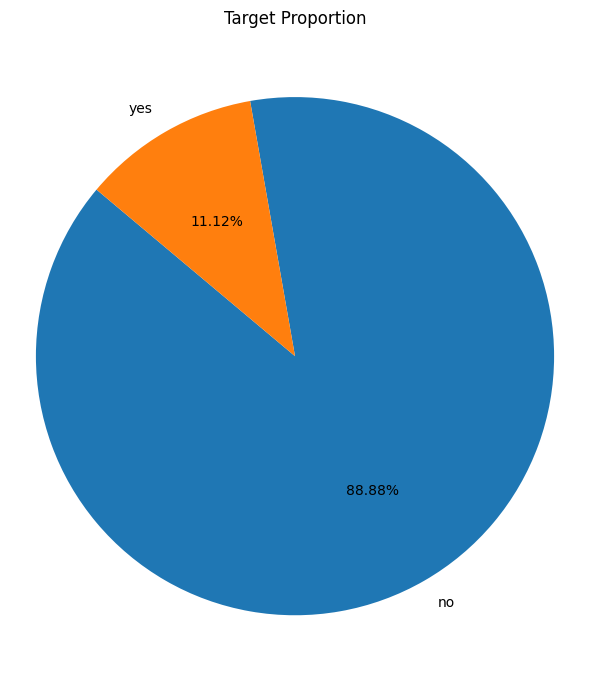

In [8]:
y_inf_count = y_inf.value_counts()

# Target pie-chart plotting.
plt.figure(figsize=(6, 7))
pie_chart_y = plt.pie(y_inf_count, labels=y_inf_count.index, autopct='%2.2f%%', startangle=140)
plt.title('Target Proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()

As seen from the image above, just like in the main program, the *class* of the target is imbalanced (*unbalanced target*).

# Target Preprocessing

Because the target is binary (yes/no), I first transformed it using `LabelEncoder`.

**Note**: Initially, I only used `le.transform(y_inf)` but encountered an error in the program, prompting the need to use `fit_transform`.

In [9]:
le = LabelEncoder()
y_inf_encoded = le.fit_transform(y_inf)

# XGB Best Model

Perform predictions using the previously saved `best XGB pipeline`.

In [11]:
y_xgb_inf = best_xgb_inf.predict(X_inf)

y_xgb_inf

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
data_inf_xgb = data_inf.copy()
data_inf_xgb['y_pred'] = y_xgb_inf
data_inf_xgb

,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,y_pred
0,admin,married,secondary,1049,yes,no,unknown,25,14,-1,0,unknown,no,0
1,blue-collar,married,secondary,765,no,no,cellular,238,1,-1,0,unknown,no,0
2,unemployed,married,secondary,2690,no,no,cellular,142,2,-1,0,unknown,no,0
3,housemaid,married,secondary,15,yes,no,telephone,133,7,-1,0,unknown,no,0
4,management,married,tertiary,1257,no,no,cellular,166,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,technician,single,tertiary,364,no,yes,cellular,162,3,205,3,failure,no,0
2155,technician,married,secondary,660,no,no,cellular,115,1,-1,0,unknown,no,0
2156,management,divorced,tertiary,-901,yes,no,unknown,86,3,-1,0,unknown,no,0
2157,management,married,tertiary,4087,yes,no,unknown,457,5,-1,0,unknown,no,0


The saved model successfully performed classification predictions on the dataset.

In [13]:
print("XGB CLASSIFICATION REPORT - Data Inference")
target = ['No', 'Yes']
print(classification_report(y_inf_encoded, y_xgb_inf, target_names = target))

XGB CLASSIFICATION REPORT - Data Inference
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      1919
         Yes       0.62      0.40      0.48       240

    accuracy                           0.91      2159
   macro avg       0.77      0.68      0.72      2159
weighted avg       0.89      0.91      0.90      2159



Although evaluation checks were not initially necessary, I just wanted to see the accuracy score of the model on the inference data, and it showed a quite good accuracy of 91%. Despite the data imbalance (as seen from the f-score results), it indicates fairly good performance.